# Análise de Vendas de Videogames

Este notebook implementa dois modelos de classificação para analisar os gêneros 'Adventure' e 'Shooter' de jogos que mais venderam com base no dataset vgsales.csv.

In [38]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [39]:
# Carregando o dataset
df = pd.read_csv('vgsales.csv')

# Exibindo as primeiras linhas para entender a estrutura dos dados
print("Visão geral dos dados:")
df.head()

Visão geral dos dados:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
# Informações sobre o dataset
print("Informações do dataset:")
df.info()

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
df.describe()

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Estatísticas descritivas:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [41]:
# Verificando valores nulos
print("Valores nulos por coluna:")
df.isnull().sum()

# Lidando com valores nulos (removendo ou imputando)
df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Year'] = df['Year'].fillna(0)

print(df['Genre'].value_counts())

# Removendo linhas com Gêneros diferentes de 'Shooter' e 'Adventure'
df = df[df['Genre'].isin(['Shooter', 'Adventure'])]

# Verificando a distribuição das classes
print("Distribuição das classes (Gênero):")
print(df['Genre'].value_counts())

Valores nulos por coluna:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64
Distribuição das classes (Gênero):
Genre
Shooter      1310
Adventure    1286
Name: count, dtype: int64


In [42]:
# Preparação dos dados para o modelo

# Codificando variáveis categóricas
label_encoder = LabelEncoder()
df['Platform_Encoded'] = label_encoder.fit_transform(df['Platform'])
df['Publisher_Encoded'] = label_encoder.fit_transform(df['Publisher'])
df['Name'] = label_encoder.fit_transform(df['Name'])

# Definindo features e target
# Features: vendas em diferentes regiões e outras características
# Target: o gênero do jogo
X = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Platform_Encoded', 'Publisher_Encoded', 'Name']]
y = df['Genre']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Modelo com Random Forest

In [43]:
# Criando e treinando o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

# Fazendo previsões
y_pred = rf_model.predict(X_test)

In [44]:
# Avaliando o modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.8153846153846154

Relatório de classificação:
              precision    recall  f1-score   support

   Adventure       0.84      0.76      0.80       247
     Shooter       0.80      0.86      0.83       273

    accuracy                           0.82       520
   macro avg       0.82      0.81      0.81       520
weighted avg       0.82      0.82      0.81       520



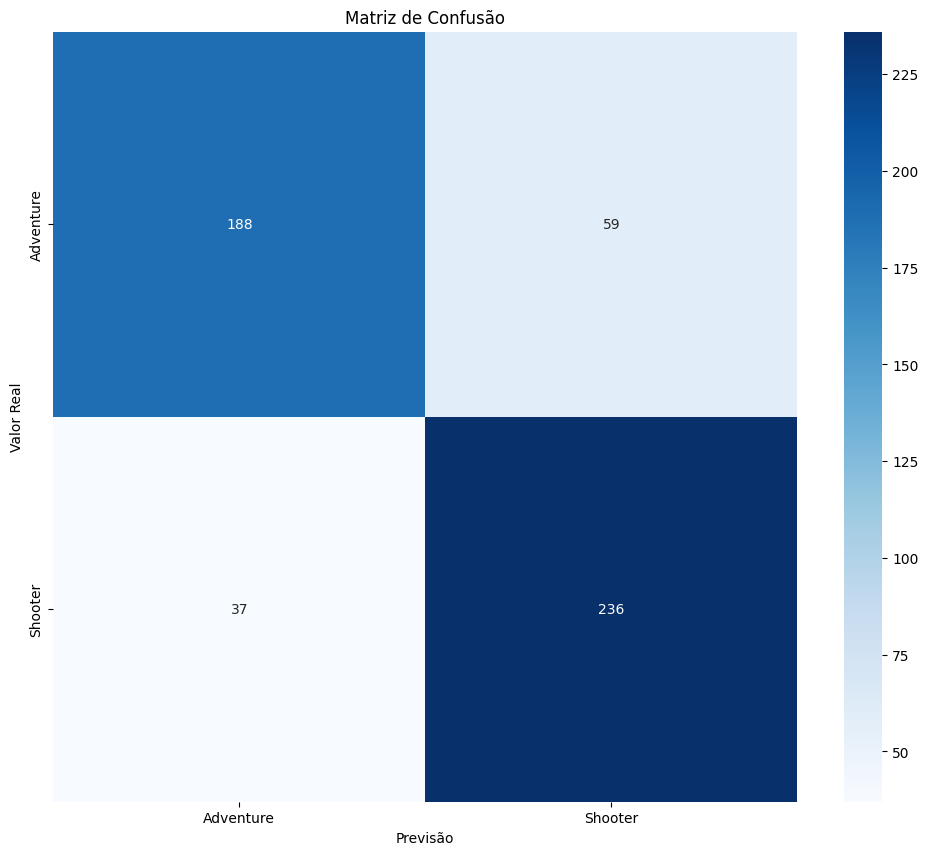

In [45]:
# Matriz de confusão
plt.figure(figsize=(12, 10))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

## Modelo com KNN

In [46]:

# Criando e treinando o modelo KNN
rf_model = KNeighborsClassifier(n_neighbors=5)
rf_model.fit(X_train, y_train)
# Fazendo previsões

y_pred = rf_model.predict(X_test)

# Avaliando o modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))



Acurácia do modelo: 0.7269230769230769

Relatório de classificação:
              precision    recall  f1-score   support

   Adventure       0.72      0.70      0.71       247
     Shooter       0.74      0.75      0.74       273

    accuracy                           0.73       520
   macro avg       0.73      0.73      0.73       520
weighted avg       0.73      0.73      0.73       520



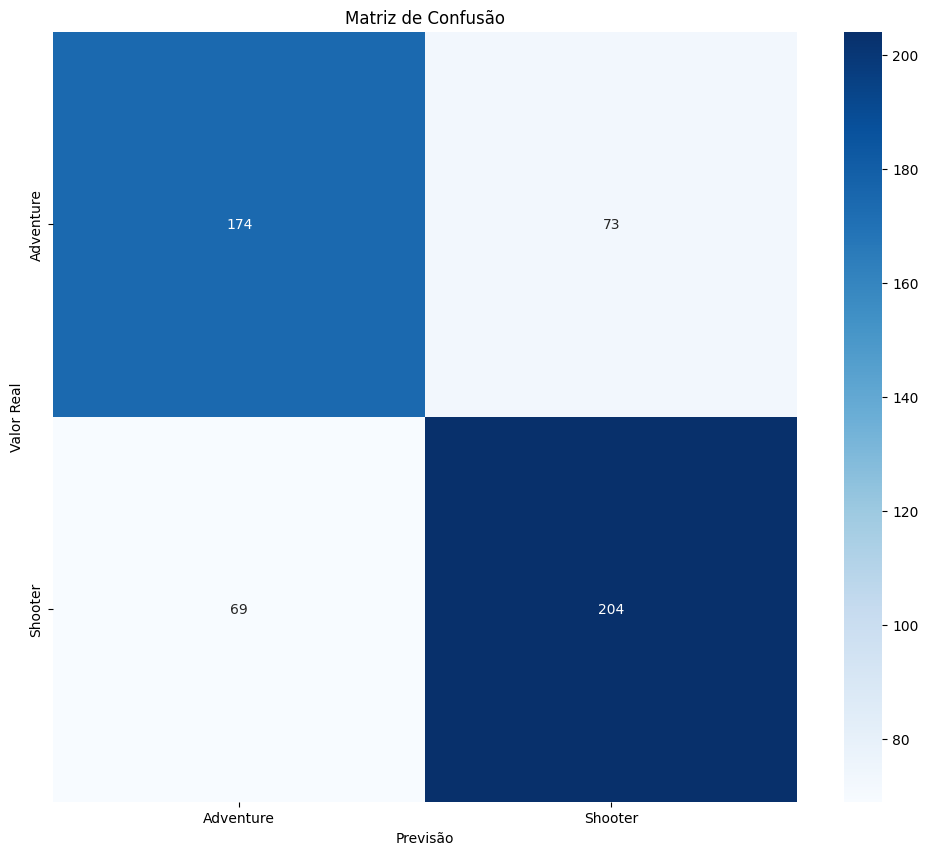

In [47]:
# Matriz de confusão
plt.figure(figsize=(12, 10))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()


## Modelo com K-Means

In [48]:
from sklearn.cluster import KMeans
# Normalizando os dados para KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Genre','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
# Aplicando o método do cotovelo para determinar o número ideal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


KeyError: "['Genre'] not in index"

In [ ]:
# Criando e treinando o modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

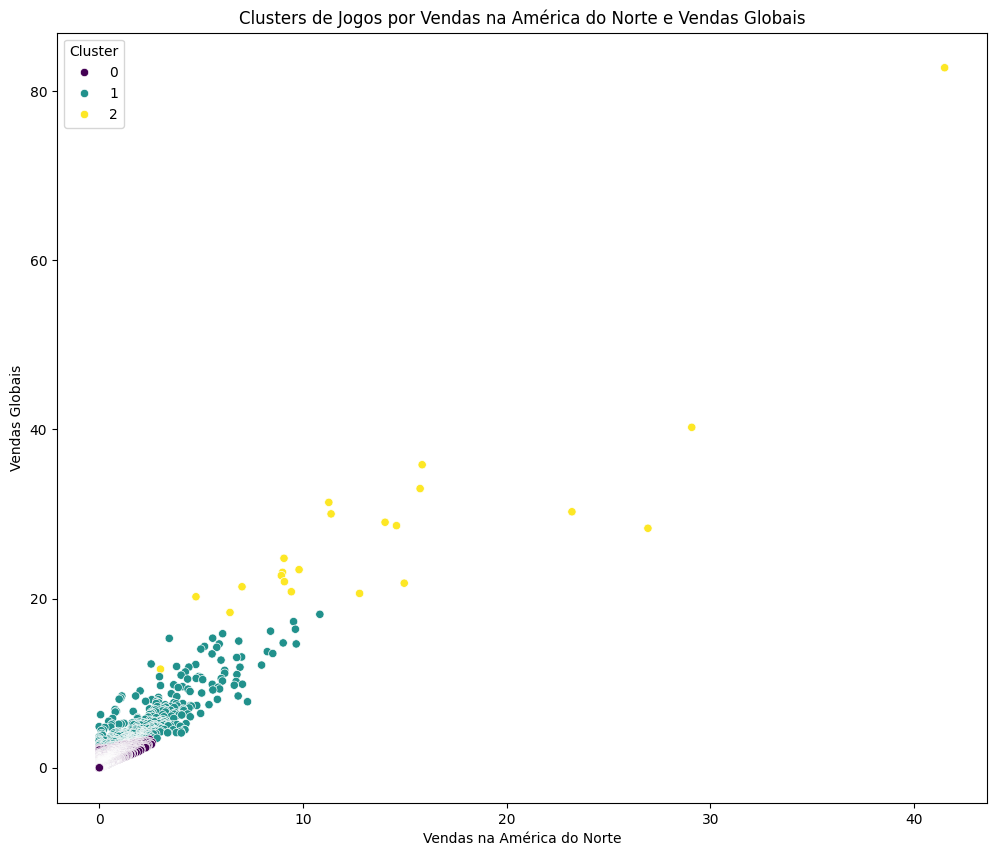

In [ ]:
# Visualizando os clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='NA_Sales', y='Global_Sales', hue='Cluster', palette='viridis')
plt.title('Clusters de Jogos por Vendas na América do Norte e Vendas Globais')
plt.xlabel('Vendas na América do Norte')
plt.ylabel('Vendas Globais')
plt.legend(title='Cluster')
plt.show()


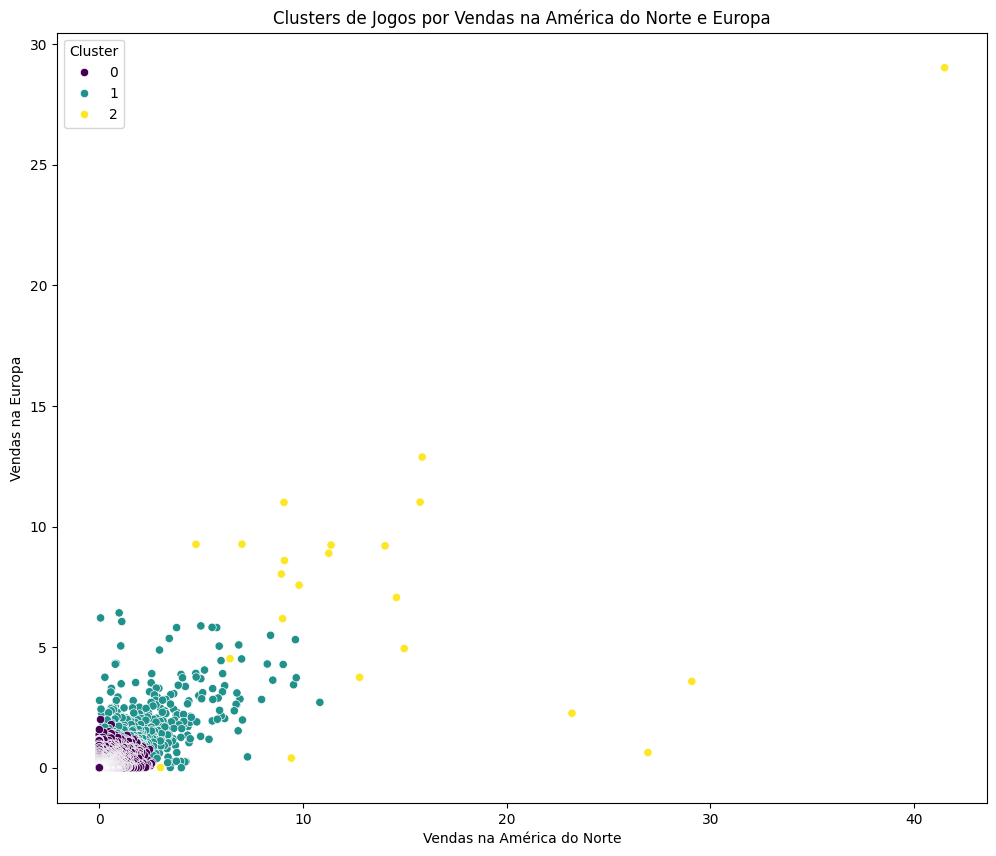

In [ ]:
# Visualizando os clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales', hue='Cluster', palette='viridis')
plt.title('Clusters de Jogos por Vendas na América do Norte e Europa')
plt.xlabel('Vendas na América do Norte')
plt.ylabel('Vendas na Europa')
plt.legend(title='Cluster')
plt.show()

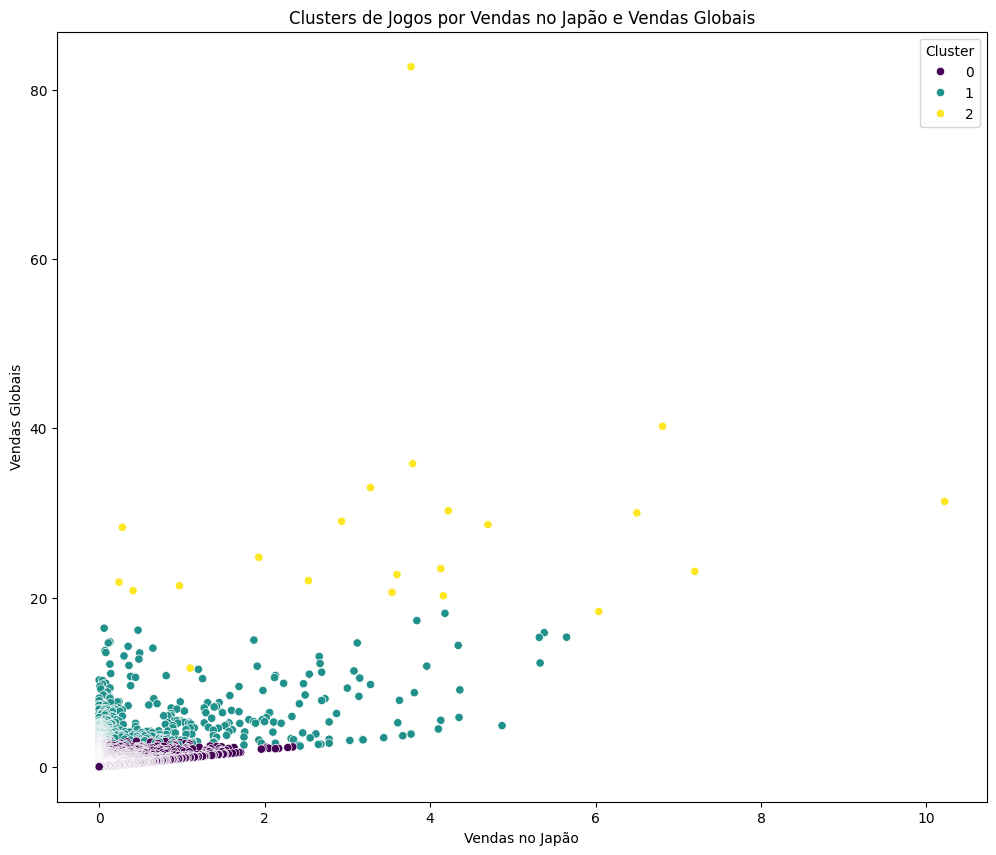

In [ ]:
# Visualizando os clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='JP_Sales', y='Global_Sales', hue='Cluster', palette='viridis')
plt.title('Clusters de Jogos por Vendas no Japão e Vendas Globais')
plt.xlabel('Vendas no Japão')
plt.ylabel('Vendas Globais')
plt.legend(title='Cluster')
plt.show()